In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [36]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')

# Preparations
n = len(df)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test

base = ["engine_displacement", "horsepower", "vehicle_weight", "model_year"]

In [37]:
# EDA
df.head(10)


,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
5,190,3.0,NaN,2484.883986,14.7,2008,Europe,Gasoline,All-wheel drive,-1.0,17.271818
6,240,7.0,127.0,3006.542287,22.2,2012,USA,Gasoline,Front-wheel drive,1.0,13.210412
7,150,4.0,239.0,3638.657780,17.3,2020,USA,Diesel,All-wheel drive,1.0,12.848884
8,250,1.0,174.0,2714.219310,10.3,2016,Asia,Diesel,Front-wheel drive,-1.0,16.823554
9,150,4.0,123.0,3509.036569,10.2,2005,USA,Gasoline,Front-wheel drive,-1.0,12.298355


In [7]:
df.dtypes


engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
fuel_efficiency_mpg    float64
dtype: object

In [8]:
df.dtypes[df.dtypes == 'object'].index

Index(['origin', 'fuel_type', 'drivetrain'], dtype='object')

In [9]:
for col in df.columns:
    print(col)
    print(df[col].head())
    print(df[col].unique())
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()
    

engine_displacement
0    170
1    130
2    170
3    220
4    210
Name: engine_displacement, dtype: int64
[170 130 220 210 190 240 150 250 230 320 200 160 180 260 120 280  40  80
 110 380 270 140 290 340 310 100  90 330 300 350  70  60 370  50  10  30]
[170 130 220 210 190]
36

num_cylinders
0    3.0
1    5.0
2    NaN
3    4.0
4    1.0
Name: num_cylinders, dtype: float64
[ 3.  5. nan  4.  1.  7.  6.  2.  8.  0.  9. 12. 10. 11. 13.]
[ 3.  5. nan  4.  1.]
14

horsepower
0    159.0
1     97.0
2     78.0
3      NaN
4    140.0
Name: horsepower, dtype: float64
[159.  97.  78.  nan 140. 127. 239. 174. 123. 100. 145. 193. 160. 179.
 180. 132. 110. 126. 197. 133. 144. 156. 157. 206. 154. 153. 136. 168.
 149. 143. 158. 176. 108. 125. 142. 139. 170. 135. 202.  99. 152. 148.
 151. 155. 146. 199. 128. 103. 182. 141. 113. 109. 196. 111. 118. 222.
 122. 194. 166. 101.  72. 232. 172. 165. 177. 190. 129. 184. 147. 137.
 163. 162. 186. 104. 120. 200. 189. 167. 164. 191. 195.  96. 181.  71.
 130. 150. 192

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

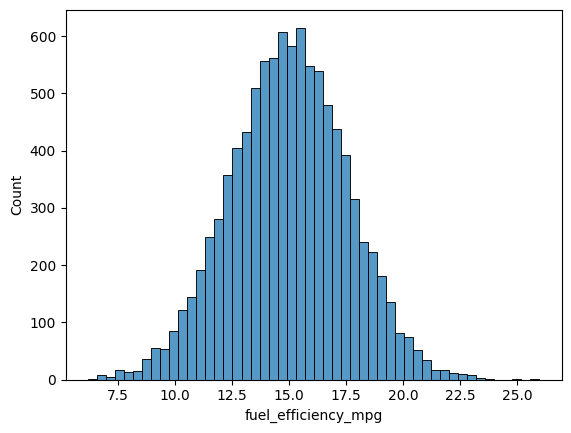

In [10]:
sns.histplot(df.fuel_efficiency_mpg, bins=50)
# EDA - no, there is no long_tail for `fuel_efficiency_mpg` column!

In [30]:
# Preparation_fill_with_0s
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [104]:
# Preparation_fill_with_ mean value
def prepare_X_mean(df):
    df_num = df[base]
    print (df.horsepower.mean())
    df_num = df_num.fillna(df.horsepower.mean())
    X = df_num.values
    return X

In [31]:
# Train LA without regularization
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]
    

In [32]:
# RMSE
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [33]:
# Regularization
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [34]:
# Q1 - Which column among 4 provided has missing values:
# Answer - column `horsepower`
df.isnull().sum()


engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [97]:
# Q2 - Median for variable `horsepower` - 
# Answer - 149
df['horsepower'].mean()

np.float64(149.65729212983547)

In [98]:
df['horsepower'].mode()

0    152.0
Name: horsepower, dtype: float64

In [111]:
# Q 3 - Preparations
seed = 42
std_val_list = []

np.random.seed(seed)

idx = np.arange(n)
np.random.shuffle(idx)
df_shuffled = df.iloc[idx]
    
# spliting dataset
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train + n_val].copy()
df_test = df_shuffled.iloc[n_train + n_val:].copy()

# copying the target parameter
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

# remove target parameter from original dataset
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']



In [112]:
# Q 3.1 filling with NAs with 0s
# Training model with 0s for NAs

X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)

# evaluation over validation dataset
X_val = prepare_X(df_val)
y_pred_val = w_0 + X_val.dot(w)
    
# RMSE score for validation
score_val_nulls = rmse(y_val, y_pred_val)
    
    
# print some details:
print('filled with 0s w_0=%.8f, rmse-score-val=%.2f' % (w_0, score_val_nulls))

filled with 0s w_0=28.82736547, rmse-score-val=0.52


In [113]:
# Q 3 - 3.2 filling with NAs with means
# Training model with 0s for NAs
X_train = prepare_X_mean(df_train)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)

# evaluation over validation dataset
X_val = prepare_X(df_val)
y_pred_val = w_0 + X_val.dot(w)
    
# RMSE score for validation
score_val_means = rmse(y_val, y_pred_val)    
    
# print some details:
print('filled with %s, w_0=%.8f, rmse-score-val=%.2f' % (df_train.horsepower.mean(), w_0, score_val_means))

149.54476367006487
filled with 149.54476367006487, w_0=28.92525995, rmse-score-val=0.61


In [ ]:
# not relevant tested different seeds behavior
seed 42
filled with 0s w_0=28.82736547, rmse-score-val=0.52
filled with 149.54476367006487, w_0=28.92525995, rmse-score-val=0.61

seed 56
filled with 0s w_0=25.93385892, rmse-score-val=0.51
filled with 149.08747440908246, w_0=27.13117490, rmse-score-val=0.58


In [96]:
# Q 4 - Train Regularized Linear regression
seed = 42
std_val_list = []

np.random.seed(seed)

idx = np.arange(n)
np.random.shuffle(idx)
df_shuffled = df.iloc[idx]
    
# spliting dataset
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train + n_val].copy()
df_test = df_shuffled.iloc[n_train + n_val:].copy()

# copying the target parameter
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

# remove target parameter from original dataset
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    
    # train model, by filling NAs with 0s
    X_train = prepare_X(df_train)
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_train.dot(w)

    # evaluation over validation dataset
    X_val = prepare_X(df_val)
    y_pred_val = w_0 + X_val.dot(w)
    
    # RMSE score for validation
    score_val = rmse(y_val, y_pred_val)
    
    std_val_list.append(score_val)
    
    # print some details:
    print('r=%2s, w_0=%.8f, rmse-score-val=%.2f' % (r, w_0, score_val))


r= 0, w_0=28.82736547, rmse-score-val=0.52
r=0.01, w_0=24.92683842, rmse-score-val=0.52
r=0.1, w_0=11.23966108, rmse-score-val=0.52
r= 1, w_0=1.73159794, rmse-score-val=0.52
r= 5, w_0=0.36380750, rmse-score-val=0.52
r=10, w_0=0.18306247, rmse-score-val=0.52
r=100, w_0=0.01841802, rmse-score-val=0.52


In [88]:
# Q 5 - Training with different seeds
std_val_list = []
std_pred_list = []

for seed_from_list in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(seed_from_list)
    idx = np.arange(n)
    np.random.shuffle(idx)
    df_shuffled = df.iloc[idx]
    
    # spliting dataset
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train + n_val].copy()
    df_test = df_shuffled.iloc[n_train + n_val:].copy()

    # copying the target parameter
    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values

    # remove target parameter from original dataset
    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']

    # train model
    X_train = prepare_X(df_train)
    w_0, w = train_linear_regression(X_train, y_train)

    y_pred = w_0 + X_train.dot(w)

    # RMSE score for train
    score_train = rmse(y_train, y_pred)
    
    std_pred_list.append(score_train)

    # evaluation over validation dataset
    X_val = prepare_X(df_val)
    y_pred_val = w_0 + X_val.dot(w)
    
    # RMSE score for validation
    score_val = rmse(y_val, y_pred_val)
    
    std_val_list.append(score_val)
    
    # print some details:
    print('seed=%s, w_0=%.8f, rmse-score-train=%.8f, rmse-score-val=%.8f' % (seed_from_list, w_0, score_train, score_val))


# Calculatiing STD
std_pred = np.std(std_pred_list)

std_val = np.std(std_val_list)

print("std_pred=%.3f, std_val=%.3f" % (std_pred, std_dev))

seed=0, w_0=27.37638875, rmse-score-train=0.51715609, rmse-score-val=0.52065313
seed=1, w_0=29.02246855, rmse-score-train=0.51485293, rmse-score-val=0.52133889
seed=2, w_0=25.90435761, rmse-score-train=0.52055831, rmse-score-val=0.52280700
seed=3, w_0=28.01545007, rmse-score-train=0.51986648, rmse-score-val=0.51595167
seed=4, w_0=25.93400040, rmse-score-train=0.51716755, rmse-score-val=0.51091295
seed=5, w_0=25.89950696, rmse-score-train=0.51951775, rmse-score-val=0.52834065
seed=6, w_0=25.91723093, rmse-score-train=0.51241150, rmse-score-val=0.53139107
seed=7, w_0=28.41432473, rmse-score-train=0.52476363, rmse-score-val=0.50906704
seed=8, w_0=26.47841783, rmse-score-train=0.52430639, rmse-score-val=0.51473991
seed=9, w_0=27.51385258, rmse-score-train=0.52197098, rmse-score-val=0.51318659
std_pred=0.004, std_val=0.007


In [54]:
# Q 6.0 - Shuffle dataset using seed 9 and split it 
# Q 6.0.1 - shuffling with seed 9
np.random.seed(9)

idx = np.arange(n)
np.random.shuffle(idx)
idx

array([9066, 3073, 2476, ..., 6782, 4444, 8574], shape=(9704,))

In [41]:
df_shuffled = df.iloc[idx]
#df_shuffled

In [86]:
# Q 6.0.2 spliting dataset
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train + n_val].copy()
df_test = df_shuffled.iloc[n_train + n_val:].copy()

# Q 6.0.3 - copying the target parameter
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

# Q 6.0.4 - remove target parameter from original dataset
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']


In [87]:
y_train

array([10.30469994, 13.47943378, 16.19065297, ..., 10.59243514,
       17.11926051, 18.11450381], shape=(5824,))

In [88]:
y_val

array([15.93165683, 13.13035472, 22.85815569, ..., 13.67814034,
       17.59323665, 16.06897494], shape=(1940,))

In [89]:
y_test

array([11.67579118, 16.7303261 , 11.83102773, ..., 13.24562126,
       15.21527037, 14.50900005], shape=(1940,))

In [90]:
#base = ["engine_displacement", "horsepower", "vehicle_weight", "model_year"]

In [63]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)
w_0


np.float64(27.513852581224892)

In [64]:
w

array([-7.49245681e-05,  3.51310422e-03, -5.02056083e-03,  1.02939922e-03])

In [65]:
y_pred = w_0 + X_train.dot(w)
y_pred


array([ 9.70278433, 14.02621843, 15.12894597, ..., 11.21621524,
       16.68266515, 18.18930683], shape=(5824,))

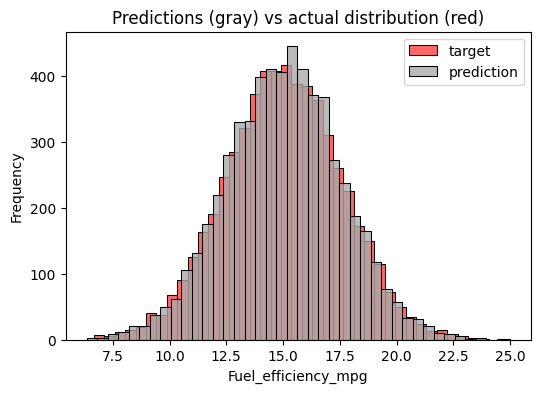

In [66]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='red', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Fuel_efficiency_mpg')
plt.title('Predictions (gray) vs actual distribution (red)')

plt.show()

In [68]:
print('rmse-train:', rmse(y_train, y_pred))

rmse-train: 0.5219709782195826


In [69]:
X_val = prepare_X(df_val)
X_val

array([[ 180.        ,  175.        , 2775.38174341, 2014.        ],
       [ 160.        ,  166.        , 3542.65518304, 2012.        ],
       [ 250.        ,  173.        , 1354.78712044, 2007.        ],
       ...,
       [ 180.        ,  154.        , 3346.96567067, 2018.        ],
       [ 210.        ,  152.        , 2500.17568746, 2020.        ],
       [ 260.        ,  174.        , 2702.25730066, 2011.        ]],
      shape=(1940, 4))

In [70]:
y_val_pred = w_0 + X_val.dot(w)
y_val_pred

array([16.25439654, 12.37007532, 23.36710155, ..., 13.31506707,
       17.55921255, 16.60892699], shape=(1940,))

In [71]:
print('rmse-validation:', rmse(y_val, y_val_pred))

rmse-validation: 0.5131865908224594


In [73]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)

In [75]:
X_full_train = prepare_X(df_full_train)
X_full_train

array([[ 240.        ,  136.        , 4050.51228957, 2006.        ],
       [ 190.        ,  141.        , 3195.86694158, 2017.        ],
       [ 200.        ,  184.        , 3006.16436968, 2017.        ],
       ...,
       [ 180.        ,  154.        , 3346.96567067, 2018.        ],
       [ 210.        ,  152.        , 2500.17568746, 2020.        ],
       [ 260.        ,  174.        , 2702.25730066, 2011.        ]],
      shape=(7764, 4))

In [76]:
y_full_train = np.concatenate([y_train, y_val])
y_full_train

array([10.30469994, 13.47943378, 16.19065297, ..., 13.67814034,
       17.59323665, 16.06897494], shape=(7764,))

In [80]:
X_test = prepare_X(df_test)
X_test

array([[ 240.        ,    0.        , 3629.91297555, 2003.        ],
       [ 230.        ,  183.        , 2675.51037108, 2011.        ],
       [ 270.        ,  176.        , 3751.00598701, 2017.        ],
       ...,
       [ 240.        ,  177.        , 3348.84005177, 2010.        ],
       [ 250.        ,  150.        , 2985.70463023, 2022.        ],
       [ 230.        ,  192.        , 3124.47364193, 2014.        ]],
      shape=(1940, 4))

In [81]:
print('%5s, %.2f' % (r, w_0))

   10, 0.23


In [100]:
y_test_pred = w_0 + X_test.dot(w)
# y_test_pred
print('rmse-validation:', rmse(y_test, y_test_pred))

rmse-validation: 0.5156261299169602


In [101]:
# Q 6.4 - calculating RMSE
for r in [0.001]:
    w_0, w = train_linear_regression_reg(X_full_train, y_full_train, r=r)
    y_test_pred = w_0 + X_test.dot(w)
    score = rmse(y_test_pred, y_test)
    print('r=%5s,  w_0=%.4f,  score=%5f' % (r, w_0, score))

r=0.001,  w_0=26.9468,  score=0.515626


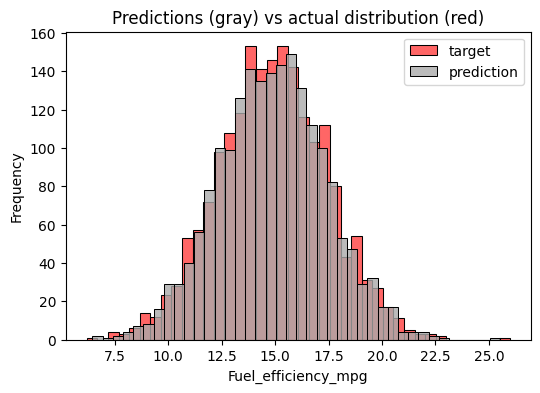

In [98]:
# Q 6.5 - graph
plt.figure(figsize=(6, 4))

sns.histplot(y_test, label='target', color='red', alpha=0.6, bins=40)
sns.histplot(y_test_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Fuel_efficiency_mpg')
plt.title('Predictions (gray) vs actual distribution (red)')

plt.show()